<a href="https://colab.research.google.com/github/luuchung/Solar-phovoltaic-faults-classification/blob/master/Student_MDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Create a custom environment
* States: Facebook, Class 1, Class 2, Class 3, Sleep
* Actions: Possible actions are dependent on the current state
* Transition probability: Deterministic transition according to selected action
* Reward: Shown in the figure
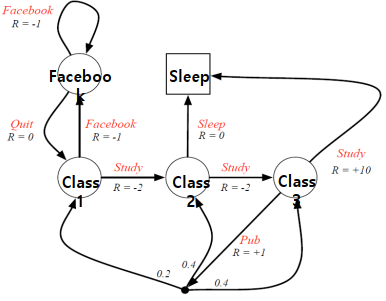

* Transition probability
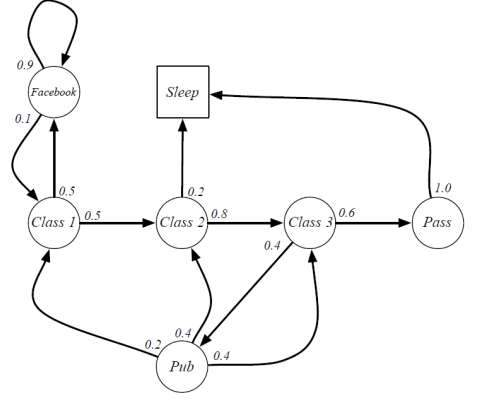

In [ ]:
class StudentMDP:
  def __init__(self):


    self.action_list = {'Facebook': ['Facebook', 'Quit'],
                   'Class1': ['Facebook', 'Study'],
                   'Class2': ['Sleep', 'Study'],
                   'Class3': ['Study'],
                   'Sleep' : ['Sleep']
                   }
    self.state = 'Class1'
    self.next_state = ''
    self.done = False
    reward = 0
    # Transition Probability
    self.action_space = ['Facebook', 'Quit', 'Study', 'Sleep']
    self.state_space = ['Facebook', 'Class1', 'Class2', 'Class3', 'Sleep']
    self.transition_matrix = {s: {a: [] for _, a in enumerate(self.action_space)} for _, s in enumerate(self.state_space)}
    self.transition_matrix['Facebook']['Facebook'] = [0.9,'Facebook', -1]
    self.transition_matrix['Facebook']['Quit'] = [0.1, 'Class1', 0]
    self.transition_matrix['Facebook']['Study'] = [0.0, 'Facebook', 0]
    self.transition_matrix['Facebook']['Sleep'] = [0.0, 'Facebook', 0]

    self.transition_matrix['Class1']['Facebook'] = [0.5, 'Facebook', -1]
    self.transition_matrix['Class1']['Quit'] = [0.0, 'Class1', 0]
    self.transition_matrix['Class1']['Study'] = [0.5, 'Class2', -2]
    self.transition_matrix['Class1']['Sleep'] = [0.0, 'Class1', 0]

    self.transition_matrix['Class2']['Facebook'] = [0.0, 'Class2', 0]
    self.transition_matrix['Class2']['Quit'] = [0.0, 'Class2', 0]
    self.transition_matrix['Class2']['Study'] = [0.8, 'Class3', -2]
    self.transition_matrix['Class2']['Sleep'] = [0.2, 'Sleep', 0]

    self.transition_matrix['Class3']['Facebook'] = [0.0, 'Class3', 0]
    self.transition_matrix['Class3']['Quit'] = [0.0, 'Class3', 0]
    self.transition_matrix['Class3']['Study'] = [1.0, 'Sleep', 10]
    self.transition_matrix['Class3']['Sleep'] = [0.0, 'Class3', 0]

    self.transition_matrix['Sleep']['Facebook'] = [0.0, 'Sleep', 0]
    self.transition_matrix['Sleep']['Quit'] = [0.0, 'Sleep', 0]
    self.transition_matrix['Sleep']['Study'] = [0.0, 'Sleep', 0]
    self.transition_matrix['Sleep']['Sleep'] = [1.0, 'Sleep', 0]       
    

  def step(self, action):
    _, self.next_state, self.reward = self.transition_matrix[self.state][action]
    self.state = self.next_state # Update current_state
    if self.state == 'Sleep':
        self.done = True
    return self.next_state, self.reward, self.done

  def reset(self):
    self.state = 'Class1'
    self.reward = 0
    return self.state


## Check the environment
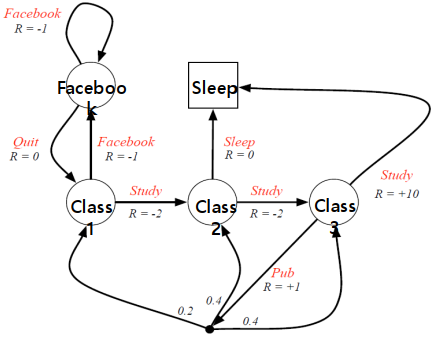

In [ ]:
import numpy as np

env = StudentMDP()

gamma = 1
reward_history = []
state_history = [env.state]
t = 0

while not env.done:
    print('Current state: '+ env.state)
    action = input('Select one of possible actions ('+ ' or '.join(env.action_list[env.state]) + '): ')
    while action not in env.action_list[env.state]:
        action = input('Select one of possible actions (' + ' or '.join(env.action_list[env.state]) + '): ')

    nxt_state, reward, done = env.step(action)
    t+=1
    reward_history.append(reward)
    state_history.append(nxt_state)
    print('Transitions: '+' -> '.join(state_history))
    print('Reward: %s\n'%(reward))

print('Episode is finished')

G_tmp = np.array(reward_history)*(gamma**np.arange(t))
G = np.cumsum(G_tmp[::-1])   # returns

print('Return of each time step')
for i in range(t):
    print('G_%d: %.2f'%(i, G[t-i-1]) )

Current state: Class1
Select one of possible actions (Facebook or Study): Facebook
Transitions: Class1 -> Facebook
Reward: -1

Current state: Facebook
Select one of possible actions (Facebook or Quit): Quit
Transitions: Class1 -> Facebook -> Class1
Reward: 0

Current state: Class1
Select one of possible actions (Facebook or Study): Study
Transitions: Class1 -> Facebook -> Class1 -> Class2
Reward: -2

Current state: Class2
Select one of possible actions (Sleep or Study): Study
Transitions: Class1 -> Facebook -> Class1 -> Class2 -> Class3
Reward: -2

Current state: Class3
Select one of possible actions (Study): Study
Transitions: Class1 -> Facebook -> Class1 -> Class2 -> Class3 -> Sleep
Reward: 10

Episode is finished
Return of each time step
G_0: 5.00
G_1: 6.00
G_2: 6.00
G_3: 8.00
G_4: 10.00


## Values interation
**one_step_lookadead** function below does one step lookahead to calculate the state-value function. it will return an array of length nA containing expected value of each action

In [ ]:
def one_step_lookahead(environment, state, V, discount_factor):
  action_values = {s: 0 for _, s in enumerate(environment.action_space)}
  for action in environment.action_list[state]:
    probability, next_state, reward = environment.transition_matrix[state][action]
    action_values[action] += probability * (reward + discount_factor * V[next_state])
  return action_values

In [ ]:
def value_iteration(environment, discount_factor=1.0, theta=1e-9, max_iterations=1e9):
        # Initialize state-value function with zeros for each environment state
        V= {s: 0 for _, s in enumerate(env.state_space)}
        for i in range(int(max_iterations)):
                # Early stopping condition
                delta = 0
                # Update each state
                for state in environment.state_space:
                        # Do a one-step lookahead to calculate state-action values
                        action_value = one_step_lookahead(environment, state, V, discount_factor)
                        # Select best action to perform based on the highest state-action value
                        best_action_value = np.max(list(action_value.values()))
                        # Calculate change in value
                        delta = max(delta, np.abs(V[state] - best_action_value))
                        # Update the value function for current state
                        V[state] = best_action_value
                        # Check if we can stop
                if delta < theta:
                        print(f'Value-iteration converged at iteration#{i}.')
                        break

        # Create a deterministic policy using the optimal value function
        policy = {s : {a: 0 for _,a in enumerate(environment.action_space)} for _,s in enumerate(environment.state_space) }
        for state in environment.state_space:
                # One step lookahead to find the best action for this state
                action_value = one_step_lookahead(environment, state, V, discount_factor)
                # Select best action based on the highest state-action value
                best_action = max(action_value, key = action_value.get)
                # Update the policy to perform a better action at a current state
                policy[state][best_action] = 1.0
        return policy, V

In [ ]:
def play_episodes(environment, policy):
        wins = 0
        total_reward = 0
        reward_history = []
        state_history = [env.state]
        t = 0
        done = False
        state = environment.reset()
        while not environment.done:
          # Select best action to perform in a current state
          action = max(policy[state], key = policy[state].get)
          # Perform an action an observe how environment acted in response
          next_state, reward, done = environment.step(action)
          t+=1
          reward_history.append(reward)
          state_history.append(next_state)
          print('Transitions: '+' -> '.join(state_history))
          print('Reward: %s\n'%(reward))
        return t, reward_history, state_history

In [ ]:
# Functions to find best policy
solvers = [('Value Iteration', value_iteration)]
for iteration_name, iteration_func in solvers:
        # Load the StudentMDP environment
        environment = StudentMDP()
        # Search for an optimal policy using policy iteration
        policy, V = iteration_func(environment)

        # Apply best policy to the real environment
        t, reward_history, state_history= play_episodes(environment, policy)

        print('Episode is finished')

        G_tmp = np.array(reward_history)*(gamma**np.arange(t))
        G = np.cumsum(G_tmp[::-1])   # returns

        print('Return of each time step')
        for i in range(t):
          print('G_%d: %.2f'%(i, G[t-i-1]) )

Value-iteration converged at iteration#4.
Transitions: Class1 -> Class2
Reward: -2

Transitions: Class1 -> Class2 -> Class3
Reward: -2

Transitions: Class1 -> Class2 -> Class3 -> Sleep
Reward: 10

Episode is finished
Return of each time step
G_0: 6.00
G_1: 8.00
G_2: 10.00
